In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import streamlit as st

In [ ]:
uber = pd.read_csv('https://raw.githubusercontent.com/faspy/raw_data/main/trips_data.csv')

In [ ]:
st.altair_chart(uber)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [ ]:
uber.info()       # Checking Uber Dataset Basic Details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


In [ ]:
uber.rename(columns={'City':'city', 'Product Type':'product_type', 'Trip or Order Status':'status', 
                     'Request Time':'request_time', 'Begin Trip Time':'begin_time',                         # Renaming Columns for ease Access 
                     'Begin Trip Lat':'begin_lat', 'Begin Trip Lng':'begin_lng',                            # and Normalize Column Names 
                     'Dropoff Time':'dropoff_time', 'Dropoff Lat':'dropoff_lat', 
                     'Dropoff Lng':'dropoff_lng', 'Distance (miles)':'distance_miles', 
                     'Fare Amount':'fare_amount', 'Fare Currency':'fare_currency'}, inplace=True)

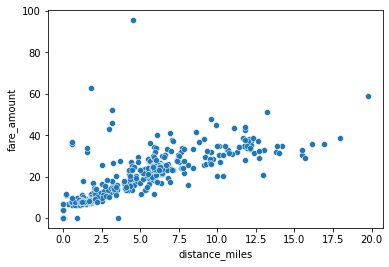

In [ ]:
sns.scatterplot(x='distance_miles',y='fare_amount',data=uber);      # we have a strong correlation between ‘fare_amount’ and ‘distance_miles’, 
                                                                         # impling that as much you stay on the ride, higher will the fare be.

In [ ]:
uber.isnull().sum().sort_values(ascending=False)                              # Checking Existance of Missing Values in dataset

dropoff_lng       29
dropoff_lat       29
begin_lng         29
begin_lat         29
fare_currency      3
product_type       3
fare_amount        0
distance_miles     0
dropoff_time       0
begin_time         0
request_time       0
status             0
city               0
dtype: int64

In [ ]:
uber[uber.product_type.isnull()]                        # This column signifies no records into our dataset, Hence Good idea is to drop them.
uber.dropna(subset = ['product_type'], inplace=True)

In [ ]:
# Checking categories in product_type column
print(uber.product_type.value_counts())

# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}

# New categories replacement
uber['product_type'].replace(product_mapping, inplace=True)

# Checking new categories in product_type column
print()
print(uber.product_type.value_counts())                   # since We found different values referring to the same category. 
                                                          # We summarized 15 original categories in 5 ones.

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL                  5
uberPOOL: MATCHED         5
Pool: MATCHED             4
Black                     3
UberBLACK                 1
uberx                     1
Juntos                    1
Name: product_type, dtype: int64

UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: product_type, dtype: int64


In [ ]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def convert_date(df, cols):
  for col in cols:
    df[col] = df[col].apply(lambda x:x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
  return df

# Applying date_convertion function to date features                                     # our dates features are in object data types, 
uber = convert_date(uber, ['request_time', 'begin_time', 'dropoff_time'])                # so we need to convert them into datetime format.

In [ ]:
uber['year'] = uber.request_time.map(lambda x: datetime.strftime(x,"%Y"))
uber['month'] = uber.request_time.map(lambda x: datetime.strftime(x,"%b"))               # Now, let’s break down <request_time> feature 
uber['weekday'] = uber.request_time.map(lambda x: datetime.strftime(x,"%a"))             # into different date parts.
uber['time'] = uber.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))
print(uber['year']+'   '+uber['month']+'   '+uber['weekday']+'   '+uber['time'])

0      2021   Jan   Wed   22:06
1      2021   Jan   Wed   20:21
2      2021   Jan   Sun   00:23
3      2020   Dec   Fri   23:16
4      2020   Dec   Fri   00:35
                 ...           
549    2016   Jun   Wed   11:07
550    2016   Apr   Thu   00:30
551    2016   Apr   Wed   21:16
552    2016   Apr   Wed   21:12
553    2015   Dec   Thu   23:52
Length: 551, dtype: object


In [ ]:
uber['distance_in_km'] = round(uber.distance_miles*1.60934, 2)                           # Converting Distance in Km from Miles
uber['amount_per_km'] = round(uber.fare_amount/uber.distance_in_km, 2)                   # Getting per Km Fare from total distance Travelled
print(uber['distance_in_km'])
print(uber['amount_per_km'])

0       7.79
1       8.55
2       9.50
3      31.77
4       4.09
       ...  
549     3.54
550     6.57
551     5.55
552     0.00
553     0.00
Name: distance_in_km, Length: 551, dtype: float64
0      3.80
1      2.44
2      3.60
3      1.85
4      3.09
       ... 
549    2.21
550    2.29
551    2.73
552     NaN
553     inf
Name: amount_per_km, Length: 551, dtype: float64


In [ ]:
# let us now check how much time (in minutes) I usually waited for Uber cars to arrive at my destination.
uber['uber_requested_time'] = uber.begin_time - uber.request_time
uber['uber_requested_time'] = uber['uber_requested_time'].apply(lambda x:round(x.total_seconds()/60, 1))
print(uber['uber_requested_time'])

0             4.4
1             6.4
2             9.6
3            11.0
4            11.0
          ...    
549           7.2
550           4.6
551           3.9
552   -24332952.1
553           8.2
Name: uber_requested_time, Length: 551, dtype: float64


In [ ]:
# Similarly let us check how much time (in minutes) was spent on each trip.
uber['trip_duration'] = uber.dropoff_time - uber.begin_time
uber['trip_duration'] = uber['trip_duration'].apply(lambda x:round(x.total_seconds()/60, 1))
print(uber['trip_duration'])

0            18.1
1            27.4
2            17.9
3            65.2
4            11.2
          ...    
549          10.2
550          14.8
551          20.8
552           0.0
553   -24173281.0
Name: trip_duration, Length: 551, dtype: float64


## **MODULE I : HOW MANY TRIPS UBER COMPLETED OVER THE YEARS**

Total Completed Trips :  453
2016     17
2017    120
2018    148
2019    113
2020     52
2021      3
Name: year, dtype: int64


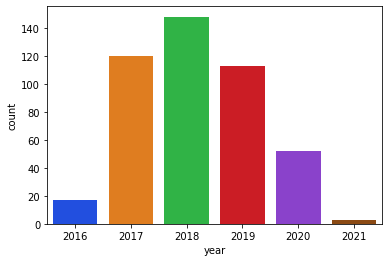

In [ ]:
# MODULE I : HOW MANY TRIPS UBER COMPLETED OVER THE YEARS
completed_trips = uber[(uber.status!='CANCELED')&(uber.status!='DRIVER_CANCELED')]

print("Total Completed Trips : ", completed_trips.status.count())
print(completed_trips.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_trips, x='year', order=['2016','2017','2018','2019','2020','2021'], palette='bright')

# **MODULE II : HOW MANY TRIPS OF UBER WERE COMPLETED OR CANCELED**

Total Trips :  551
COMPLETED          82.2
CANCELED           16.0
DRIVER_CANCELED     1.8
Name: status, dtype: float64


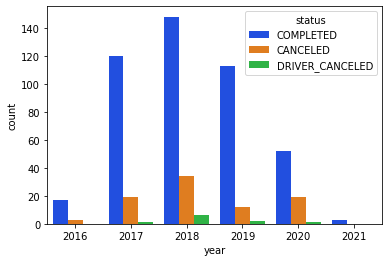

In [ ]:
# How many trips of Uber were completed or canceled?
print('Total Trips : ', uber.status.count())
print(round(uber.status.value_counts()/uber.status.size*100, 1))

sns.countplot(data=uber, x='year', order=['2016','2017','2018','2019','2020','2021'], hue='status', palette='bright')

# **MODULE III : HEATMAP OF WHERE MOST OF UBER DROP-OFFS OCCURRED**
# **[Using - Folium Python Library]**

In [ ]:
# HEATMAP OF WHERE MOST OF UBER DROP-OFFS OCCURRED [Library - folium]
# Folium help people visualize geospatial data
import folium
from folium import plugins

coordinates = []
for lat,lng in zip(completed_trips.dropoff_lat.values, completed_trips.dropoff_lng.values):
  coordinates.append([lat, lng])

map = folium.Map(
    location = [-23.5489,-46.6388],         # Location of City : 'Sao Paulo'
    tiles = 'cartodbpositron',
    zoom_start = 7,
    width = '100%',
    height = '100%',
    control_scale = True)

map.add_child(plugins.HeatMap(coordinates))
map

# **MODULE IV : WHICH PRODUCT OF UBER IS USUALLY CHOOSEN BY CUSTOMER**

                      Total Rides     %
UberX                         401  88.5
UberEATS Marketplace            9   2.0
Pool                           39   8.6
Black                           4   0.9


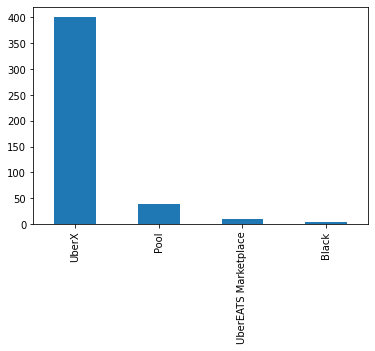

In [ ]:
# WHICH PRODUCT OF UBER IS USUALLY CHOOSEN BY CUSTOMER
pro_type_uber = pd.Series(completed_trips.product_type.value_counts().sort_index(ascending=False))
# Transforming series in dataframe
df = pd.DataFrame(pro_type_uber)
# Including new column with trips portion
df['%'] = (completed_trips.product_type.value_counts().sort_index(ascending=False)/completed_trips.product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_trips['product_type'].value_counts().plot(kind='bar');

# **MODULE V : FIND OUT AVERAGE FARE, DISTANCE, AMOUNT & TIME SPENT ON EACH RIDES**

In [ ]:
# FIND OUT AVERAGE FARE, DISTANCE, AMOUNT & TIME SPENT ON EACH RIDES
print('Average. Fare:', round(completed_trips.fare_amount.mean(),1),'BRL')
print('Average Distance:',round(completed_trips.distance_in_km.mean(),1),'km')
print('Average Fare/Km:',round(completed_trips.fare_amount.sum()/completed_trips.distance_in_km.sum(),1),'BRL/km')
print('Average Time Spent on Trips:',round(completed_trips.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_trips.fare_amount.sum(),1),'BRL')
print('Total distance:',round(completed_trips.distance_in_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_trips.trip_duration.sum()/60,1),'hours')

Average. Fare: 19.8 BRL
Average Distance: 8.0 km
Average Fare/Km: 2.5 BRL/km
Average Time Spent on Trips: 21.3 minutes

Total fare amount: 8970.8 BRL
Total distance: 3606.9 km
Total time spent on trips: 161.1 hours


# **MODULE VI : FINDING WHICH WEEKDAY IS HAVING THE HIGHEST AVERAGE FARES/KM RIDDEN**

In [ ]:
# FINDING WHICH WEEKDAY IS HAVING THE HIGHEST AVERAGE FARES/KM RIDDEN
amount_table = completed_trips.pivot_table(values='fare_amount',aggfunc='sum',columns='weekday', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = amount_table.reindex(column_order, axis=1)

distance_table = completed_trips.pivot_table(values='distance_in_km',aggfunc='sum',columns='weekday', index='year').round(1)
distance_table = distance_table.reindex(column_order, axis=1)

(amount_table/distance_table).round(1)

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2016,NaN,NaN,2.8,2.4,NaN,2.1,2.9
2017,2.8,2.1,2.4,2.2,2.7,2.1,2.7
2018,2.0,1.9,3.0,2.0,2.2,2.5,2.2
2019,2.7,2.4,3.2,2.3,3.1,2.9,3.7
2020,2.7,2.4,2.7,2.6,2.4,3.1,2.8
2021,NaN,NaN,3.1,NaN,NaN,NaN,3.6
